This notebook creates a few visualizations that illustrate trends in income inequality over the past few decades in the US. This is based on data from the Census Bureau, found in tables A-2, A-4, and some more of "Income and Poverty in the United States: 2018", here: https://www.census.gov/data/tables/2019/demo/income-poverty/p60-266.html

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

# 1. Load and process historical income distribution table

In [3]:
# Load data
df_ie = pd.read_excel('/gh/data/census/income/2018_to_1967_income_inequality_metrics.xls',
                      skiprows=6, nrows=10, index_col=0).T

# Change column names
col_names = list(df_ie.columns)
col_numbers = [int(''.join([s for s in name if s.isdigit()])) for name in col_names]
df_ie = df_ie.rename(columns=dict(zip(col_names, col_numbers)))

# Format df
df_ie = df_ie.reset_index().rename(columns={'index': 'year'})
df_ie['year'] = [int(str(x).split()[0]) for x in df_ie['year']]
df_ie = df_ie.rename_axis('percentile', axis=1)

df_ie.head()

percentile,year,10,20,30,40,50,60,70,80,90,95
0,2018,14629,25600,37002,50000,63179,79542,100162,130000,184292,248728
1,2017,14652,25432,35916,48369,62626,79039,100390,129691,186190,250038
2,2017,14566,25239,35868,48258,62868,79442,100202,129947,183442,242812
3,2016,14239,25116,36324,47716,61779,78343,98519,126634,178450,235704
4,2015,14053,24166,34188,46117,59901,76314,96117,124011,171895,227309


# 2a. Plot changes in income percentiles over time

/Users/scott/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


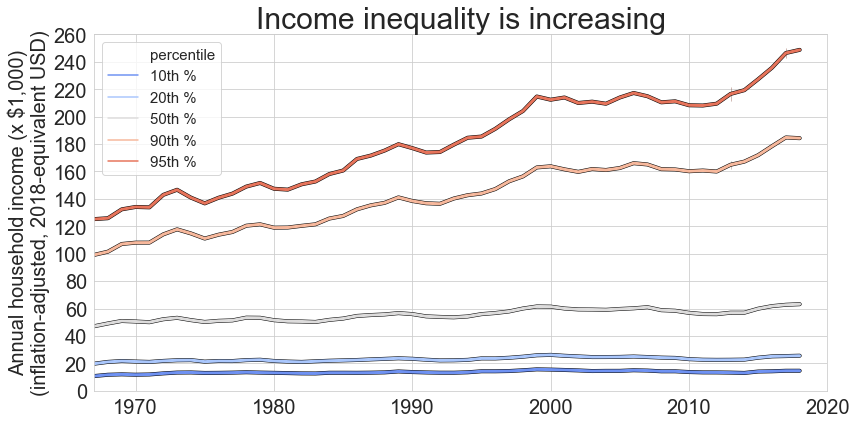

In [7]:
df_plt = pd.melt(df_ie, id_vars=['year'], value_vars=col_numbers)
pcs_plt = [10, 20, 50, 90, 95]
df_plt = df_plt[df_plt['percentile'].isin(pcs_plt)]
df_plt['percentile'] = ['{}th %'.format(x) for x in df_plt['percentile']]
df_plt['value'] = df_plt['value'] / 1000


plt.figure(figsize=(12,6))
sns.lineplot(data=df_plt, x='year', y='value', hue='percentile',
             palette=['k', 'k', 'k', 'k', 'k'], linewidth=4, legend=False)
g = sns.lineplot(data=df_plt, x='year', y='value', hue='percentile',
             palette="coolwarm", linewidth=3)
plt.legend(fontsize=15, loc='upper left')

plt.xlabel('')
plt.ylim((0, 260))
plt.ylabel('Annual household income (x $1,000)\n(inflation-adjusted, 2018-equivalent USD)', size=20)
plt.yticks(np.arange(0, 280, 20), size=20)
plt.xticks(size=20)
plt.xlim((min(df_plt['year']), 2020))
plt.title('Income inequality is increasing', size=30)
plt.tight_layout()
plt.show(g)

# 2b. Plot changes in ratios of percentiles

In [9]:
df_ie['90% : 10%'] = df_ie[90] / df_ie[10]
df_ie['90% : 50%'] = df_ie[90] / df_ie[50]
df_ie['95% : 10%'] = df_ie[95] / df_ie[10]
df_ie['95% : 50%'] = df_ie[95] / df_ie[50]
df_ie['50% : 10%'] = df_ie[50] / df_ie[10]
df_ie.head()

percentile,year,10,20,30,40,50,60,70,80,90,95,90% : 10%,90% : 50%,95% : 10%,95% : 50%,50% : 10%
0,2018,14629,25600,37002,50000,63179,79542,100162,130000,184292,248728,12.597717,2.916982,17.002393,3.936878,4.318750
1,2017,14652,25432,35916,48369,62626,79039,100390,129691,186190,250038,12.707480,2.973046,17.065111,3.992559,4.274229
2,2017,14566,25239,35868,48258,62868,79442,100202,129947,183442,242812,12.593849,2.917891,16.669779,3.862251,4.316079
3,2016,14239,25116,36324,47716,61779,78343,98519,126634,178450,235704,12.532481,2.888522,16.553410,3.815277,4.338718
4,2015,14053,24166,34188,46117,59901,76314,96117,124011,171895,227309,12.231908,2.869652,16.175123,3.794745,4.262506


/Users/scott/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


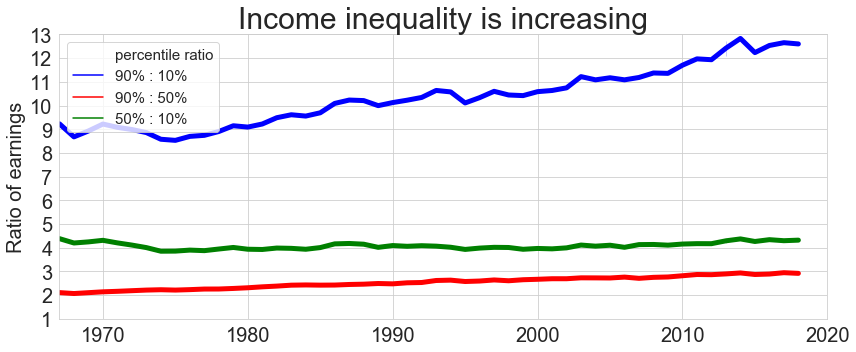

In [10]:
df_plt = pd.melt(df_ie.rename_axis('percentile ratio', axis=1),
                 id_vars=['year'],
                 value_vars=['90% : 10%', '90% : 50%', '50% : 10%'])

plt.figure(figsize=(12,5))
g = sns.lineplot(data=df_plt, x='year', y='value', hue='percentile ratio',
             palette=['b', 'r', 'g'], linewidth=5)
plt.legend(fontsize=15, loc='upper left')

plt.xlabel('')
plt.ylim((1, 13))
plt.ylabel('Ratio of earnings', size=20)
plt.yticks(np.arange(1, 14), size=20)
plt.xticks(size=20)
plt.xlim((min(df_plt['year']), 2020))
plt.title('Income inequality is increasing', size=30)
plt.tight_layout()
plt.show(g)

# 3. Load income distributions by race

In [13]:
# Define the start row of each data set
n_rows_skip_map = {'all': 4,
                   'white alone': 61,
                   'white': 83,
                   'white alone, not hispanic': 121,
                   'white, not hispanic': 143,
                   'black alone or in combination': 176,
                   'black alone': 198,
                   'black': 220,
                   'asian alone or in combination': 258,
                   'asian alone': 280,
                   'asian and pacific islander': 302,
                   'hispanic': 320
                  }
last_row = 371

# Define the row length of each data set
n_rows_skip_vals = np.append(np.array(list(n_rows_skip_map.values())), last_row)
n_rows_map = {}
for k in n_rows_skip_map.keys():
    row_start = n_rows_skip_map[k]
    n_rows_map[k] = min(n_rows_skip_vals[n_rows_skip_vals > row_start]) - row_start - 3

# Convert column names
col_names_map = {
        'Number\n(thousands) Unnamed: 1_level_1'.replace(' ', ''): 'n',
        'Percent distribution Total'.replace(' ', ''): 'pc_total',
        'Percent distribution Under $15,000'.replace(' ', ''): '< 15k',
        'Percent distribution $15,000         to             $24,999'.replace(' ', ''): '15-25k',
        'Percent distribution $25,000      to               $34,999'.replace(' ', ''): '25-35k',
        'Percent distribution $35,000             to            $49,999'.replace(' ', ''): '35-50k',
        'Percent distribution $50,000           to                 $74,999'.replace(' ', ''): '50-75k',
        'Percent distribution $75,000       to      $99,999'.replace(' ', ''): '75-100k',
        'Percent distribution $100,000 to $149,999'.replace(' ', ''): '100-150k',
        'Percent distribution $150,000 to $199,999'.replace(' ', ''): '150-200k',
        'Percent distribution $200,000 and over'.replace(' ', ''): '> 200k',
        'Median income               (dollars) Estimate'.replace(' ', ''): 'median',
        'Median income               (dollars) Standard error'.replace(' ', ''): 'median se',
        'Mean income               (dollars) Estimate'.replace(' ', ''): 'mean',
        'Mean income               (dollars) Standard error'.replace(' ', ''): 'mean se',
    }

In [14]:
def load_race_table(table_name):
    """Load table for a given section"""
    # Load data
    df_all = pd.read_excel('/gh/data/census/income/2018_to_1967_income_distribution_race.xls',
                          skiprows=n_rows_skip_map[table_name], header=[0,1], nrows=n_rows_map[table_name],
                           index_col=0)

    # Merge multiindex columns
    df_all.columns = [' '.join(col).strip().replace(' ', '') for col in df_all.columns.values]

    # Clean table
    df_all = df_all.rename(columns=col_names_map)
    
    # Fix and de-dup year
    df_all = df_all.rename(columns=col_names_map)
    df_all = df_all.drop(['n', 'pc_total', 'median se', 'mean se'], axis=1)
    df_all = df_all.reset_index().rename(columns={'index': 'year'})
    df_all['year'] = [int(str(x).split()[0]) for x in df_all['year']]
    df_all = df_all.drop_duplicates(subset=['year'])

    return df_all

In [15]:
table_names = n_rows_skip_map.keys()

dfs = []
for table_name in table_names:
    df_tmp = load_race_table(table_name)
    df_tmp['race'] = table_name
    dfs.append(df_tmp)
df_income_race = pd.concat(dfs)

# Fix null
df_income_race['mean'] = df_income_race['mean'].replace({'N': np.nan}).astype(float)

df_income_race.head()

,year,< 15k,15-25k,25-35k,35-50k,50-75k,75-100k,100-150k,150-200k,> 200k,median,mean,race
0,2018,10.2,8.9,8.8,12.0,17.2,12.5,14.9,7.0,8.5,63179,90021.0,all
1,2017,10.3,9.4,9.1,12.2,16.6,12.2,14.6,7.0,8.6,62626,89779.0,all
3,2016,10.6,9.1,9.4,12.5,16.8,12.4,14.6,7.0,7.7,61779,87001.0,all
4,2015,10.8,10.0,9.8,12.2,16.5,12.2,14.8,6.8,7.0,59901,84011.0,all
5,2014,11.8,10.4,9.7,12.8,16.9,11.7,14.0,6.3,6.5,56969,80413.0,all


# 4. Plot median income by race

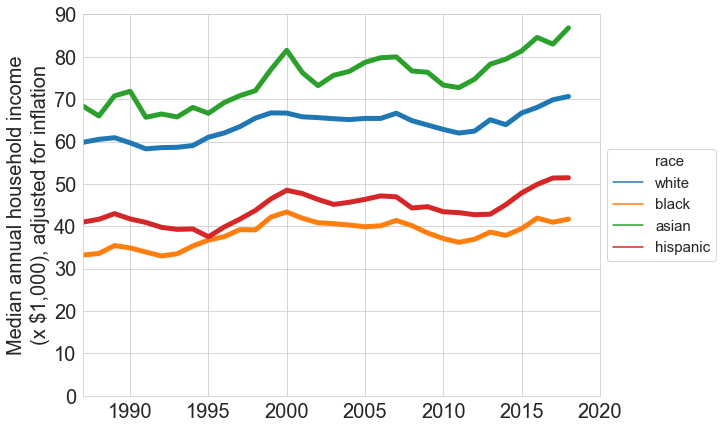

In [16]:
df_plt = df_income_race.copy()
df_plt['median'] = df_plt['median'] / 1000

races_keep = ['white alone, not hispanic',
       'white, not hispanic', 'black alone or in combination',
       'black', 'asian alone or in combination',
       'asian and pacific islander', 'hispanic']
df_plt = df_plt[df_plt['race'].isin(races_keep)]

# rename races
df_plt['race_old'] = df_plt['race']
df_plt['race'] = df_plt['race_old'].map({'white alone, not hispanic': 'white',
                                        'white, not hispanic': 'white',
                                        'black alone or in combination': 'black',
                                        'black': 'black',
                                        'asian alone or in combination': 'asian',
                                        'asian and pacific islander':'asian',
                                        'hispanic': 'hispanic'})

plt.figure(figsize=(8,6))
sns.lineplot(data=df_plt, x='year', y='median', hue='race',
             linewidth=5)
plt.tight_layout()
plt.xlabel('')
plt.ylabel('Median annual household income\n(x $1,000), adjusted for inflation', size=20)
plt.yticks(np.arange(0, 100, 10), size=20)
plt.xticks(size=20)
plt.xlim(1987, 2020)
plt.ylim((0,90))
plt.legend(bbox_to_anchor=(1,.5), fontsize=15, loc='center left', title='')

# 4b. Plot income distributions by bin

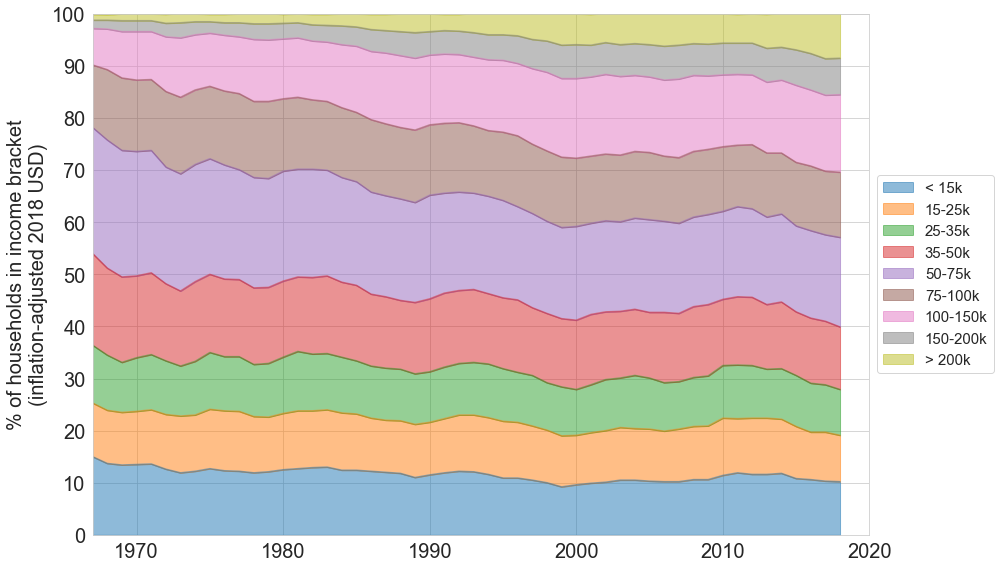

In [19]:
race_plt = 'all'

# rename races
df_plt = df_income_race.copy()
df_plt['race_old'] = df_plt['race']
df_plt['race'] = df_plt['race_old'].map({'white alone, not hispanic': 'white',
                                        'white, not hispanic': 'white',
                                        'black alone or in combination': 'black',
                                        'black': 'black',
                                        'asian alone or in combination': 'asian',
                                        'asian and pacific islander':'asian',
                                        'hispanic': 'hispanic',
                                        'all': 'all'})

df_plt = df_plt[df_plt['race']==race_plt].drop(['mean', 'median', 'race', 'race_old'], axis=1).set_index('year')

plt.figure(figsize=(14, 8))
ax = plt.gca()
df_plt.plot.area(ax=ax, alpha=.5)

plt.xticks(size=20)
plt.yticks(np.arange(0, 110, 10), size=20)
plt.xlim((min(df_plt.index), 2020))
plt.ylim((0, 100))
plt.xlabel('')
plt.ylabel('% of households in income bracket\n(inflation-adjusted 2018 USD)', size=20)

plt.legend(bbox_to_anchor=(1,.5), loc='center left', fontsize=15)

plt.tight_layout()

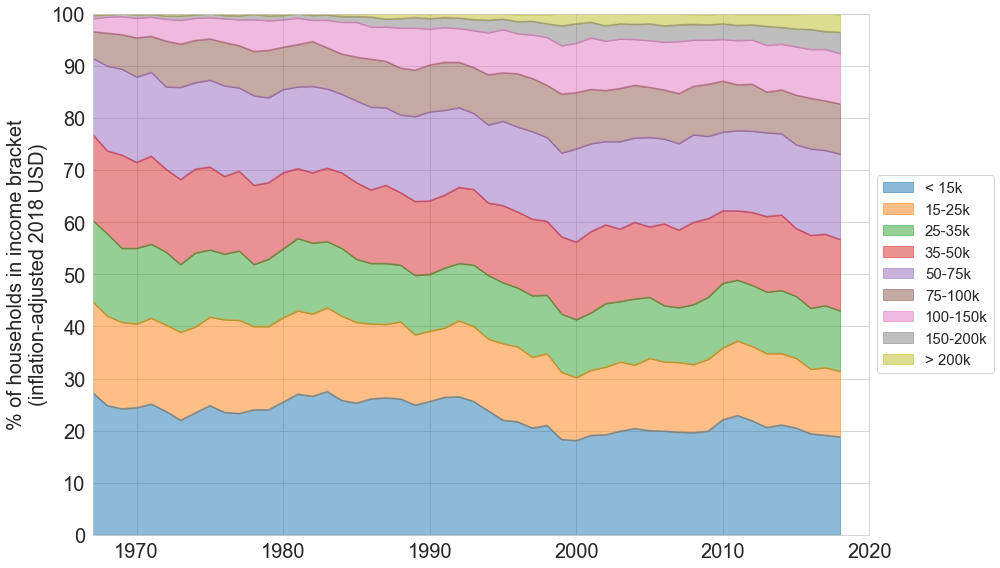

In [21]:
race_plt = 'black'

# rename races
df_plt = df_income_race.copy()
df_plt['race_old'] = df_plt['race']
df_plt['race'] = df_plt['race_old'].map({'white alone, not hispanic': 'white',
                                        'white, not hispanic': 'white',
                                        'black alone or in combination': 'black',
                                        'black': 'black',
                                        'asian alone or in combination': 'asian',
                                        'asian and pacific islander':'asian',
                                        'hispanic': 'hispanic',
                                        'all': 'all'})

df_plt = df_plt[df_plt['race']==race_plt].drop(['mean', 'median', 'race', 'race_old'], axis=1).set_index('year')

plt.figure(figsize=(14, 8))
ax = plt.gca()
df_plt.plot.area(ax=ax, alpha=.5)

plt.xticks(size=20)
plt.yticks(np.arange(0, 110, 10), size=20)
plt.xlim((min(df_plt.index), 2020))
plt.ylim((0, 100))
plt.xlabel('')
plt.ylabel('% of households in income bracket\n(inflation-adjusted 2018 USD)', size=20)

plt.legend(bbox_to_anchor=(1,.5), loc='center left', fontsize=15)

plt.tight_layout()

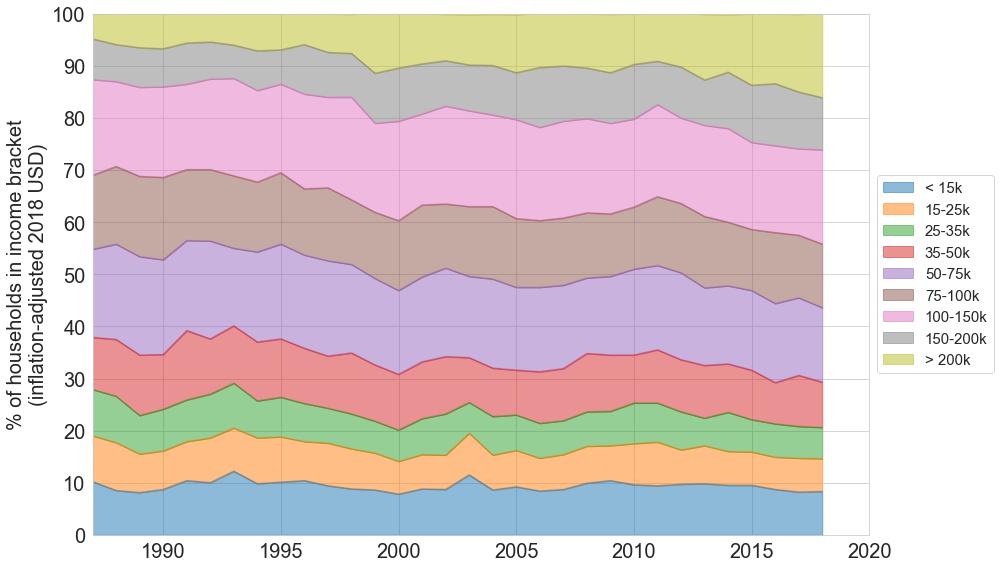

In [20]:
race_plt = 'asian'

# rename races
df_plt = df_income_race.copy()
df_plt['race_old'] = df_plt['race']
df_plt['race'] = df_plt['race_old'].map({'white alone, not hispanic': 'white',
                                        'white, not hispanic': 'white',
                                        'black alone or in combination': 'black',
                                        'black': 'black',
                                        'asian alone or in combination': 'asian',
                                        'asian and pacific islander':'asian',
                                        'hispanic': 'hispanic',
                                        'all': 'all'})

df_plt = df_plt[df_plt['race']==race_plt].drop(['mean', 'median', 'race', 'race_old'], axis=1).set_index('year')

plt.figure(figsize=(14, 8))
ax = plt.gca()
df_plt.plot.area(ax=ax, alpha=.5)

plt.xticks(size=20)
plt.yticks(np.arange(0, 110, 10), size=20)
plt.xlim((min(df_plt.index), 2020))
plt.ylim((0, 100))
plt.xlabel('')
plt.ylabel('% of households in income bracket\n(inflation-adjusted 2018 USD)', size=20)

plt.legend(bbox_to_anchor=(1,.5), loc='center left', fontsize=15)

plt.tight_layout()

# 5a. Poverty rate over time

Text(0, 0.5, 'Poverty rate')

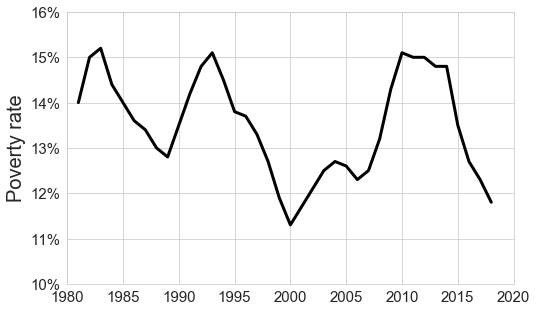

In [23]:
df = pd.read_excel('/gh/data/census/income/Impact_Poverty.xls',
                  skiprows=7, usecols=[0,3], nrows=40, names=['year', 'poverty_percent'])
df['year'] = np.array([str(x)[:4] for x in df['year']], dtype=int)
df = df.drop_duplicates(subset=['year'])

fig = plt.figure(figsize=(8,5))
plt.plot(df['year'], df['poverty_percent'], 'k', linewidth=3)
plt.ylim(10, 16)
plt.xlim((1980, 2020))
plt.xticks(size=15)
plt.yticks(np.arange(10, 17), ['{}%'.format(x) for x in np.arange(10, 17)], size=15)
plt.ylabel('Poverty rate', size=20)

# 5b. Poverty rate in different states

In [ ]:
df_pov_state = pd.read_excel('/gh/data/census/income/state.xls', usecols=[0,1], names=['state', 'poverty_rate'],
                   skiprows=10, nrows=55)
df_pov_state = df_pov_state.dropna()
df_pov_state['state'] = [str(x).replace('.', '').strip() for x in df_pov_state['state']]
df_pov_state = df_pov_state[df_pov_state['state']!='District of Columbia…'].reset_index(drop=True)

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
df_pov_state['state_abbrev'] = df_pov_state['state'].map(us_state_abbrev)
df_pov_state.head()

df_pov_state.head()